This code works out the sensitivity of both the 1 step and 2 step model by measuring variance, mean and burst size before and after a 10% change in one parameter. Each cell represents a 10% change in one of the following parameters respectively:

(1-step)
-Kon
-Koff
-K1

(2-Step)
-Ton
-Toff
-Kon
-Koff
-Kt (K1+K2)

In the 2 step model, K1 and K2 have been combined to form Kt in order to more accurately compare to 1 step K1 as they both represent different modes of mRNA output whereas K1 in step 1 accounts for all mRNA output.

Graphs are shown below to compare changes in mean, variance and burst sensitivity after a 10% increase in Kon, Koff, and K1 (+ K2) in 1 step and 2 step models.

Burst sensitivity in graphs is shown as: (x1/x2)-1. We found this easier to compare sensitivities that were positive and negative while not taking into account their direction of travel. I.e. the two step model variance is similarly sensitive to Ton (0.74) and Toff (-0.74) though they have opposite effects.

Please run all cells in order. Results will appear after the last cell.

Text(0,0.5,'mRNA ')

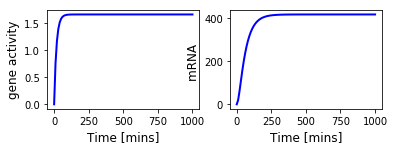

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
import random as rng
import math
from statistics import mean
from matplotlib import pyplot

def expression(x,t):
    g = x[0]
    m = x[1]
    #p = x[2]
    
    kon = 0.05 #min-1
    koff = 0.01 #min-1  
    k1 = 5 #mRNA/min
    d1 = 0.02 #min, corresponding to half-life of approximately 30 min
    gd=kon*(2.0-g)-koff*g
    md = k1*g-d1*m
    #pd = k2*m-d2*p

    return [gd,md]

t=np.linspace(0,1000,100)
x0 = [0,0]
x = odeint(expression,x0,t)

plt.figure(1)

plt.subplot(221)
plt.plot(t, x[:,0], 'b-', linewidth=2)
plt.xlabel('Time [mins]', fontsize=12)
plt.ylabel('gene activity', fontsize= 12)

plt.subplot(222)
plt.plot(t, x[:,1], 'b-', linewidth=2)
plt.xlabel('Time [mins]', fontsize=12)
plt.ylabel('mRNA ', fontsize= 12)

[224.1596928517182, 240.17010809829205]
[60779.96738944, 66557.27904896]


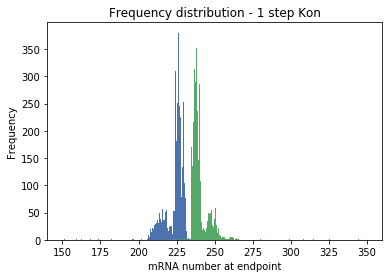

In [6]:
import random as rng
oneStepVars = []

si_kon_var = [];
si_kon_mean = [];

si_kon_var.clear()
si_kon_mean.clear()
    
kon_ = 0.0025 #min-1
koff_ = 0.001 #min-1  
k1_ = 4 #mRNA/min
d1_ = 0.003 #min, corresponding to half-life of approximately 30 min 

for j in range(2):
    X2ends = [];
    X2mean = [];
    X2ends.clear()
    X2mean.clear()

    for i in range(5000):
        #initial conditions and variables
        x0=0  #ton/off variable
        x1=0  #Genes on
        x2=0  #mRNA level

        #reaction rates
        kon = kon_ #min-1
        koff = koff_ #min-1  
        k1 = k1_ #mRNA/min
        d1 = d1_ #min, corresponding to half-life of approximately 30 min 

        #Parameters
        maxTime = 180.0   # maximum simulation time
        time=0
        X1=[x1]
        X2=[x2]

        T=[time]
        while time < maxTime:
            #reaction propensities
            a1=kon*(2.0-x1) #gene activation
            a2=koff*x1    # gene inactivation
            a3=k1*x1 # mRNA production
            a4=d1*x2 # mRNA degradation

            a0=a1+a2+a3+a4   #total propensity

            #Time to next reaction
            r1 = rng.random() #uniform random number
            tau    = 1.0/a0 * math.log(1.0/r1)
            time  += tau

            #which reaction to occur?
            r2 = rng.random() #uniform random number
            if r2<a1/a0: 
                x1+=1
            if (r2>=a1/a0 and r2<(a1+a2)/a0):
                x1-=1
            if (r2>=(a1+a2)/a0 and r2<(a1+a2+a3)/a0):
                x2+=1
            if (r2>=(a1+a2+a3)/a0 and r2<(a1+a2+a3+a4)/a0):
                x2-=1   
            X1.append(x1)
            X2.append(x2)
        X2ends.append(X2[-1])
        X2mean.append(mean(X2ends))
    
    plt.style.use('seaborn-deep')
    bins = np.linspace(150, 350, 500)
    plt.ylabel('Frequency')
    plt.xlabel('mRNA number at endpoint')
    plt.title('Frequency distribution - 1 step Kon')
    pyplot.hist(X2mean, bins)
    
    kon_ += kon*0.1
    
    si_kon_mean.append(mean(X2mean))
    si_kon_var.append(np.var(X2ends))
    
    X2mean.clear()
    X2ends.clear()

print(si_kon_mean)
print(si_kon_var)

[216.74188396163478, 237.2160709201902]
[63521.41212335999, 73749.99477824001]


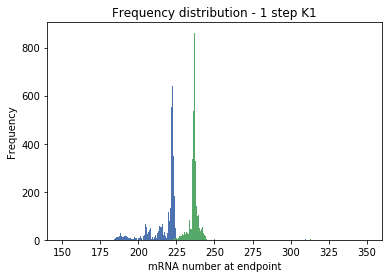

In [7]:
oneStepVars = []

si_k1_var = [];
si_k1_mean = [];

si_k1_var.clear()
si_k1_mean.clear()
    
kon_ = 0.0025 #min-1
koff_ = 0.001 #min-1  
k1_ = 4 #mRNA/min
d1_ = 0.003 #min, corresponding to half-life of approximately 30 min 

for j in range(2):
    X2ends = [];
    X2mean = [];
    X2ends.clear()
    X2mean.clear()

    for i in range(5000):
        #initial conditions and variables
        x0=0  #ton/off variable
        x1=0  #Genes on
        x2=0  #mRNA level

        #reaction rates
        kon = kon_ #min-1
        koff = koff_ #min-1  
        k1 = k1_ #mRNA/min
        d1 = d1_ #min, corresponding to half-life of approximately 30 min 

        #Parameters
        maxTime = 180.0   # maximum simulation time
        time=0
        X1=[x1]
        X2=[x2]

        T=[time]
        while time < maxTime:
            #reaction propensities
            a1=kon*(2.0-x1) #gene activation
            a2=koff*x1    # gene inactivation
            a3=k1*x1 # mRNA production
            a4=d1*x2 # mRNA degradation

            a0=a1+a2+a3+a4   #total propensity

            #Time to next reaction
            r1 = rng.random() #uniform random number
            tau    = 1.0/a0 * math.log(1.0/r1)
            time  += tau

            #which reaction to occur?
            r2 = rng.random() #uniform random number
            if r2<a1/a0: 
                x1+=1
            if (r2>=a1/a0 and r2<(a1+a2)/a0):
                x1-=1
            if (r2>=(a1+a2)/a0 and r2<(a1+a2+a3)/a0):
                x2+=1
            if (r2>=(a1+a2+a3)/a0 and r2<(a1+a2+a3+a4)/a0):
                x2-=1   
            X1.append(x1)
            X2.append(x2)
        X2ends.append(X2[-1])
        X2mean.append(mean(X2ends))
        
        
    plt.style.use('seaborn-deep')
    bins = np.linspace(150, 350, 500)
    plt.ylabel('Frequency')
    plt.xlabel('mRNA number at endpoint')
    plt.title('Frequency distribution - 1 step K1')
    pyplot.hist(X2mean, bins)
    
    k1_ += k1*0.1
    
    si_k1_mean.append(mean(X2mean))
    si_k1_var.append(np.var(X2ends))
    
    X2mean.clear()
    X2ends.clear()

print(si_k1_mean)
print(si_k1_var)

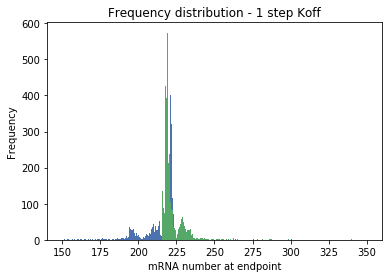

In [8]:
si_koff_var = [];
si_koff_mean = [];

si_koff_var.clear()
si_koff_mean.clear()
    
kon_ = 0.0025 #min-1
koff_ = 0.001 #min-1  
k1_ = 4 #mRNA/min
d1_ = 0.003 #min, corresponding to half-life of approximately 30 min 

X2ends = [];
X2mean = [];

for j in range(2): 
    X2ends = [];
    X2mean = [];
    X2ends.clear()
    X2mean.clear()

    for i in range(5000):
        #initial conditions and variables
        x0=0  #ton/off variable
        x1=0  #Genes on
        x2=0  #mRNA level

        #reaction rates
        kon = kon_ #min-1
        koff = koff_ #min-1  
        k1 = k1_ #mRNA/min
        d1 = d1_ #min, corresponding to half-life of approximately 30 min 

        #Parameters
        maxTime = 180.0   # maximum simulation time
        time=0
        X1=[x1]
        X2=[x2]

        T=[time]
        while time < maxTime:
            #reaction propensities
            a1=kon*(2.0-x1) #gene activation
            a2=koff*x1    # gene inactivation
            a3=k1*x1 # mRNA production
            a4=d1*x2 # mRNA degradation

            a0=a1+a2+a3+a4   #total propensity

            #Time to next reaction
            r1 = rng.random() #uniform random number
            tau    = 1.0/a0 * math.log(1.0/r1)
            time  += tau

            #which reaction to occur?
            r2 = rng.random() #uniform random number
            if r2<a1/a0: 
                x1+=1
            if (r2>=a1/a0 and r2<(a1+a2)/a0):
                x1-=1
            if (r2>=(a1+a2)/a0 and r2<(a1+a2+a3)/a0):
                x2+=1
            if (r2>=(a1+a2+a3)/a0 and r2<(a1+a2+a3+a4)/a0):
                x2-=1   
            X1.append(x1)
            X2.append(x2)
        X2ends.append(X2[-1])
        X2mean.append(mean(X2ends))
        
    plt.style.use('seaborn-deep')
    bins = np.linspace(150, 350, 500)
    plt.ylabel('Frequency')
    plt.xlabel('mRNA number at endpoint')
    plt.title('Frequency distribution - 1 step Koff')
    pyplot.hist(X2mean, bins)
    
    koff_ += koff*0.1
    
    si_koff_mean.append(mean(X2mean))
    si_koff_var.append(np.var(X2ends))
    
    X2mean.clear()
    X2ends.clear()
    
print(si_koff_mean)
print(si_koff_var)

[64748.27188636, 76270.70844544]
[221.04092921347876, 246.89538311952273]


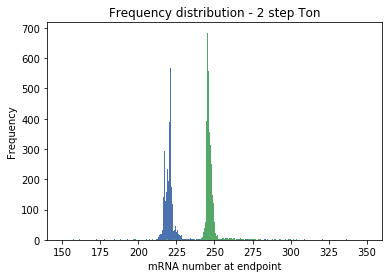

In [9]:
iis_ton_var = [];
iis_ton_mean = [];

iis_ton_var.clear()
iis_ton_mean.clear()

ton_ = 0.009 #min-1
toff_ = 0.025 #min-1
kon_ = 0.025 #min-1
koff_ = 0.01 #min-1
k1_ = 0.4 #mRNA/min mRNA produced when ton and koff (too high)
k2_ = 8.9 #mRNA produced when ton+kon
d1_ = 0.003 #min, corresponding to half-life of approximately 30 min 

for j in range(2):
    X2ends = [];
    X2mean = [];
    X2ends.clear()
    X2mean.clear()

    for i in range(5000):
        #initial conditions and variables
        x0=0  #ton/off variable
        x1=0  #Genes on
        x2=0  #mRNA level

        #ton=0.009 ± 0.002 min-1 toff=0.025± 0.008 min-1 kon=0.025 ± 0.01 min-1 koff=0.01 ± 0.01 min-1 kt2=8.9 ± 1 mRNA min-1 kt1=0.4 ± 0.2 mRNA min-1 kd=0.003 ± 0.001 min-1

        #reaction rates
        ton = ton_ #min-1
        toff = toff_ #min-1
        kon = kon_ #min-1
        koff = koff_ #min-1
        k1 = k1_ #mRNA/min mRNA produced when ton and koff (too high)
        k2 = k2_ #mRNA produced when ton+kon
        d1 = d1_ #min, corresponding to half-life of approximately 30 min 

        #Parameters
        maxTime = 180.0   # maximum simulation time
        time=0
        X0=[0]
        X1=[x1]
        X2=[x2]

        T=[time]
        a=[0,0,0,0,0,0,0]

        while time < maxTime:
            #reaction propensities
            a[0]=(2.0-x0-x1)*ton
            a[1]=toff*x0
            a[2]=toff*x1
            a[3]=kon*x0
            a[4]=koff*x1
            a[5]=k1*x1+x1*k2 # mRNA production
            a[6]=d1*x2  # mRNA degradation

            a0=sum(a)

            #Time to next reaction
            r1 = rng.random() #uniform random number
            tau    = 1.0/a0 * math.log(1.0/r1)
            time  += tau

            s=0
            mu=0
            r2 = rng.random()
            ra = r2*a0

            while s<ra:
                mu+=1
                s+=a[mu-1]

            #which reaction to occur?

            if mu==1: 
                x0 +=1
            if mu==2:
                x0 -=1
            if mu==3:
                x1 -=1
            if mu==4:
                x1 +=1
                x0 -=1
            if mu==5:
                x1 -=1
                x0 +=1
            if mu==6:
                x2+=1
            if mu==7: 
                x2-=1
           
            X1.append(x1)
            X2.append(x2)
        X2ends.append(X2[-1])
        X2mean.append(mean(X2ends))
    
    plt.style.use('seaborn-deep')
    bins = np.linspace(150, 350, 500)
    plt.ylabel('Frequency')
    plt.xlabel('mRNA number at endpoint')
    plt.title('Frequency distribution - 2 step Ton')
    pyplot.hist(X2mean, bins)
    
    ton_ += ton*0.1

    iis_ton_var.append(np.var(X2ends))
    iis_ton_mean.append(mean(X2mean))
    
print(iis_ton_var)
print(iis_ton_mean)

[68095.12653404, 59474.619532159995]
[226.48754241529625, 204.36735244893288]


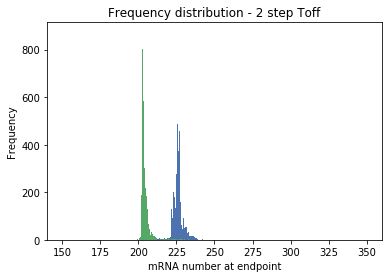

In [10]:
iis_toff_var = [];
iis_toff_mean = [];

iis_toff_var.clear()
iis_toff_mean.clear()

ton_ = 0.009 #min-1
toff_ = 0.025 #min-1
kon_ = 0.025 #min-1
koff_ = 0.01 #min-1
k1_ = 0.4 #mRNA/min mRNA produced when ton and koff (too high)
k2_ = 8.9 #mRNA produced when ton+kon
d1_ = 0.003 #min, corresponding to half-life of approximately 30 min 

for j in range(2):
    X2ends = [];
    X2mean = [];
    X2ends.clear()
    X2mean.clear()

    for i in range(5000):
        #initial conditions and variables
        x0=0  #ton/off variable
        x1=0  #Genes on
        x2=0  #mRNA level

        #ton=0.009 ± 0.002 min-1 toff=0.025± 0.008 min-1 kon=0.025 ± 0.01 min-1 koff=0.01 ± 0.01 min-1 kt2=8.9 ± 1 mRNA min-1 kt1=0.4 ± 0.2 mRNA min-1 kd=0.003 ± 0.001 min-1

        #reaction rates
        ton = ton_ #min-1
        toff = toff_ #min-1
        kon = kon_ #min-1
        koff = koff_ #min-1
        k1 = k1_ #mRNA/min mRNA produced when ton and koff (too high)
        k2 = k2_ #mRNA produced when ton+kon
        d1 = d1_ #min, corresponding to half-life of approximately 30 min 

        #Parameters
        maxTime = 180.0   # maximum simulation time
        time=0
        X0=[0]
        X1=[x1]
        X2=[x2]

        T=[time]
        a=[0,0,0,0,0,0,0]

        while time < maxTime:
            #reaction propensities
            a[0]=(2.0-x0-x1)*ton
            a[1]=toff*x0
            a[2]=toff*x1
            a[3]=kon*x0
            a[4]=koff*x1
            a[5]=k1*x1+x1*k2 # mRNA production
            a[6]=d1*x2  # mRNA degradation

            a0=sum(a)

            #Time to next reaction
            r1 = rng.random() #uniform random number
            tau    = 1.0/a0 * math.log(1.0/r1)
            time  += tau

            s=0
            mu=0
            r2 = rng.random()
            ra = r2*a0

            while s<ra:
                mu+=1
                s+=a[mu-1]

            #which reaction to occur?

            if mu==1: 
                x0 +=1
            if mu==2:
                x0 -=1
            if mu==3:
                x1 -=1
            if mu==4:
                x1 +=1
                x0 -=1
            if mu==5:
                x1 -=1
                x0 +=1
            if mu==6:
                x2+=1
            if mu==7: 
                x2-=1
           
            X1.append(x1)
            X2.append(x2)
        X2ends.append(X2[-1])
        X2mean.append(mean(X2ends))
        
    plt.style.use('seaborn-deep')
    bins = np.linspace(150, 350, 500)
    plt.ylabel('Frequency')
    plt.xlabel('mRNA number at endpoint')
    plt.title('Frequency distribution - 2 step Toff')
    pyplot.hist(X2mean, bins)
    
    toff_ += toff*0.1
    
    iis_toff_var.append(np.var(X2ends))
    iis_toff_mean.append(mean(X2mean))
print(iis_toff_var)
print(iis_toff_mean)

[65490.936639, 67686.04895899999]
[227.97843956528772, 233.331590837817]


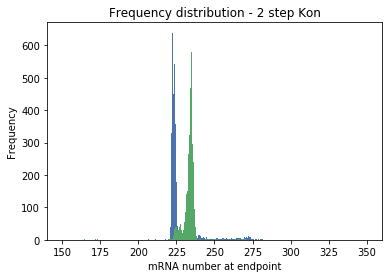

In [11]:
iis_kon_var = [];
iis_kon_mean = [];

iis_kon_var.clear()
iis_kon_mean.clear()

ton_ = 0.009 #min-1
toff_ = 0.025 #min-1
kon_ = 0.025 #min-1
koff_ = 0.01 #min-1
k1_ = 0.4 #mRNA/min mRNA produced when ton and koff (too high)
k2_ = 8.9 #mRNA produced when ton+kon
d1_ = 0.003 #min, corresponding to half-life of approximately 30 min 

for j in range(2):
    X2ends = [];
    X2mean = [];
    X2ends.clear()
    X2mean.clear()

    for i in range(5000):
        #initial conditions and variables
        x0=0  #ton/off variable
        x1=0  #Genes on
        x2=0  #mRNA level

        #ton=0.009 ± 0.002 min-1 toff=0.025± 0.008 min-1 kon=0.025 ± 0.01 min-1 koff=0.01 ± 0.01 min-1 kt2=8.9 ± 1 mRNA min-1 kt1=0.4 ± 0.2 mRNA min-1 kd=0.003 ± 0.001 min-1

        #reaction rates
        ton = ton_ #min-1
        toff = toff_ #min-1
        kon = kon_ #min-1
        koff = koff_ #min-1
        k1 = k1_ #mRNA/min mRNA produced when ton and koff (too high)
        k2 = k2_ #mRNA produced when ton+kon
        d1 = d1_ #min, corresponding to half-life of approximately 30 min 

        #Parameters
        maxTime = 180.0   # maximum simulation time
        time=0
        X0=[0]
        X1=[x1]
        X2=[x2]

        T=[time]
        a=[0,0,0,0,0,0,0]

        while time < maxTime:
            #reaction propensities
            a[0]=(2.0-x0-x1)*ton
            a[1]=toff*x0
            a[2]=toff*x1
            a[3]=kon*x0
            a[4]=koff*x1
            a[5]=k1*x1+x1*k2 # mRNA production
            a[6]=d1*x2  # mRNA degradation

            a0=sum(a)

            #Time to next reaction
            r1 = rng.random() #uniform random number
            tau    = 1.0/a0 * math.log(1.0/r1)
            time  += tau

            s=0
            mu=0
            r2 = rng.random()
            ra = r2*a0

            while s<ra:
                mu+=1
                s+=a[mu-1]

            #which reaction to occur?

            if mu==1: 
                x0 +=1
            if mu==2:
                x0 -=1
            if mu==3:
                x1 -=1
            if mu==4:
                x1 +=1
                x0 -=1
            if mu==5:
                x1 -=1
                x0 +=1
            if mu==6:
                x2+=1
            if mu==7: 
                x2-=1
           
            X1.append(x1)
            X2.append(x2)
        X2ends.append(X2[-1])
        X2mean.append(mean(X2ends))
        
    plt.style.use('seaborn-deep')
    bins = np.linspace(150, 350, 500)
    plt.ylabel('Frequency')
    plt.xlabel('mRNA number at endpoint')
    plt.title('Frequency distribution - 2 step Kon')
    pyplot.hist(X2mean, bins)
    
    kon_ += kon*0.1
    
    iis_kon_var.append(np.var(X2ends))
    iis_kon_mean.append(mean(X2mean))

print(iis_kon_var)
print(iis_kon_mean)

[65466.568711000014, 64816.330190999994]
[220.1483901159633, 227.72672980782843]


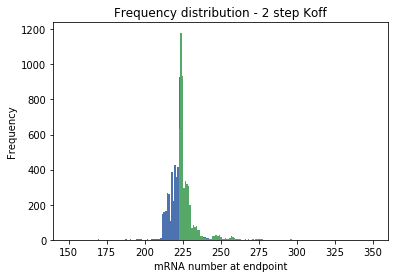

In [12]:
iis_koff_var = [];
iis_koff_mean = [];

iis_koff_var.clear()
iis_koff_mean.clear()

ton_ = 0.009 #min-1
toff_ = 0.025 #min-1
kon_ = 0.025 #min-1
koff_ = 0.01 #min-1
k1_ = 0.4 #mRNA/min mRNA produced when ton and koff (too high)
k2_ = 8.9 #mRNA produced when ton+kon
d1_ = 0.003 #min, corresponding to half-life of approximately 30 min 

for j in range(2):
    X2ends = [];
    X2mean = [];
    X2ends.clear()
    X2mean.clear()

    for i in range(5000):
        #initial conditions and variables
        x0=0  #ton/off variable
        x1=0  #Genes on
        x2=0  #mRNA level

        #ton=0.009 ± 0.002 min-1 toff=0.025± 0.008 min-1 kon=0.025 ± 0.01 min-1 koff=0.01 ± 0.01 min-1 kt2=8.9 ± 1 mRNA min-1 kt1=0.4 ± 0.2 mRNA min-1 kd=0.003 ± 0.001 min-1

        #reaction rates
        ton = ton_ #min-1
        toff = toff_ #min-1
        kon = kon_ #min-1
        koff = koff_ #min-1
        k1 = k1_ #mRNA/min mRNA produced when ton and koff (too high)
        k2 = k2_ #mRNA produced when ton+kon
        d1 = d1_ #min, corresponding to half-life of approximately 30 min 

        #Parameters
        maxTime = 180.0   # maximum simulation time
        time=0
        X0=[0]
        X1=[x1]
        X2=[x2]

        T=[time]
        a=[0,0,0,0,0,0,0]

        while time < maxTime:
            #reaction propensities
            a[0]=(2.0-x0-x1)*ton
            a[1]=toff*x0
            a[2]=toff*x1
            a[3]=kon*x0
            a[4]=koff*x1
            a[5]=k1*x1+x1*k2 # mRNA production
            a[6]=d1*x2  # mRNA degradation

            a0=sum(a)

            #Time to next reaction
            r1 = rng.random() #uniform random number
            tau    = 1.0/a0 * math.log(1.0/r1)
            time  += tau

            s=0
            mu=0
            r2 = rng.random()
            ra = r2*a0

            while s<ra:
                mu+=1
                s+=a[mu-1]

            #which reaction to occur?

            if mu==1: 
                x0 +=1
            if mu==2:
                x0 -=1
            if mu==3:
                x1 -=1
            if mu==4:
                x1 +=1
                x0 -=1
            if mu==5:
                x1 -=1
                x0 +=1
            if mu==6:
                x2+=1
            if mu==7: 
                x2-=1
           
            X1.append(x1)
            X2.append(x2)
        X2ends.append(X2[-1])
        X2mean.append(mean(X2ends))
        
    plt.style.use('seaborn-deep')
    bins = np.linspace(150, 350, 200)
    plt.ylabel('Frequency')
    plt.xlabel('mRNA number at endpoint')
    plt.title('Frequency distribution - 2 step Koff')
    pyplot.hist(X2mean, bins)
    
    koff_ += koff*0.1

    iis_koff_var.append(np.var(X2ends))
    iis_koff_mean.append(mean(X2mean))
    
print(iis_koff_var)
print(iis_koff_mean)

[63438.03465536001, 79880.84382976001]
[218.68952578847257, 239.58428584801072]


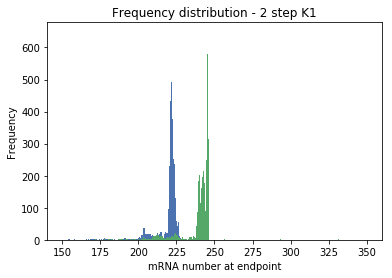

In [13]:
iis_k1_var = [];
iis_k1_mean = [];

iis_k1_var.clear()
iis_k1_mean.clear()

ton_ = 0.009 #min-1
toff_ = 0.025 #min-1
kon_ = 0.025 #min-1
koff_ = 0.01 #min-1
k1_ = 0.4 #mRNA/min mRNA produced when ton and koff (too high)
k2_ = 8.9 #mRNA produced when ton+kon
d1_ = 0.003 #min, corresponding to half-life of approximately 30 min 

for j in range(2):
    X2ends = [];
    X2mean = [];
    X2ends.clear()
    X2mean.clear()

    for i in range(5000):
        #initial conditions and variables
        x0=0  #ton/off variable
        x1=0  #Genes on
        x2=0  #mRNA level

        #ton=0.009 ± 0.002 min-1 toff=0.025± 0.008 min-1 kon=0.025 ± 0.01 min-1 koff=0.01 ± 0.01 min-1 kt2=8.9 ± 1 mRNA min-1 kt1=0.4 ± 0.2 mRNA min-1 kd=0.003 ± 0.001 min-1

        #reaction rates
        ton = ton_ #min-1
        toff = toff_ #min-1
        kon = kon_ #min-1
        koff = koff_ #min-1
        k1 = k1_ #mRNA/min mRNA produced when ton and koff (too high)
        k2 = k2_ #mRNA produced when ton+kon
        d1 = d1_ #min, corresponding to half-life of approximately 30 min 

        #Parameters
        maxTime = 180.0   # maximum simulation time
        time=0
        X0=[0]
        X1=[x1]
        X2=[x2]

        T=[time]
        a=[0,0,0,0,0,0,0]

        while time < maxTime:
            #reaction propensities
            a[0]=(2.0-x0-x1)*ton
            a[1]=toff*x0
            a[2]=toff*x1
            a[3]=kon*x0
            a[4]=koff*x1
            a[5]=k1*x1+x1*k2 # mRNA production
            a[6]=d1*x2  # mRNA degradation

            a0=sum(a)

            #Time to next reaction
            r1 = rng.random() #uniform random number
            tau    = 1.0/a0 * math.log(1.0/r1)
            time  += tau

            s=0
            mu=0
            r2 = rng.random()
            ra = r2*a0

            while s<ra:
                mu+=1
                s+=a[mu-1]

            #which reaction to occur?

            if mu==1: 
                x0 +=1
            if mu==2:
                x0 -=1
            if mu==3:
                x1 -=1
            if mu==4:
                x1 +=1
                x0 -=1
            if mu==5:
                x1 -=1
                x0 +=1
            if mu==6:
                x2+=1
            if mu==7: 
                x2-=1
           
            X1.append(x1)
            X2.append(x2)
        X2ends.append(X2[-1])
        X2mean.append(mean(X2ends))
        
    plt.style.use('seaborn-deep')
    bins = np.linspace(150, 350, 500)
    plt.ylabel('Frequency')
    plt.xlabel('mRNA number at endpoint')
    plt.title('Frequency distribution - 2 step K1')
    pyplot.hist(X2mean, bins)
    k1_ += k1*0.1
    k2_ += k2*0.1

    iis_k1_var.append(np.var(X2ends))
    iis_k1_mean.append(mean(X2mean))
    
print(iis_k1_var)
print(iis_k1_mean)

[66356.907404, 75187.35083899999]
[227.88438751875884, 248.22917596385048]


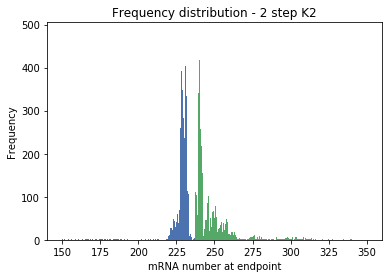

In [14]:
iis_k2_var = [];
iis_k2_mean = [];

iis_k2_var.clear()
iis_k2_mean.clear()

ton_ = 0.009 #min-1
toff_ = 0.025 #min-1
kon_ = 0.025 #min-1
koff_ = 0.01 #min-1
k1_ = 0.4 #mRNA/min mRNA produced when ton and koff (too high)
k2_ = 8.9 #mRNA produced when ton+kon
d1_ = 0.003 #min, corresponding to half-life of approximately 30 min 

for j in range(2):
    X2ends = [];
    X2mean = [];
    X2ends.clear()
    X2mean.clear()

    for i in range(5000):
        #initial conditions and variables
        x0=0  #ton/off variable
        x1=0  #Genes on
        x2=0  #mRNA level

        #ton=0.009 ± 0.002 min-1 toff=0.025± 0.008 min-1 kon=0.025 ± 0.01 min-1 koff=0.01 ± 0.01 min-1 kt2=8.9 ± 1 mRNA min-1 kt1=0.4 ± 0.2 mRNA min-1 kd=0.003 ± 0.001 min-1

        #reaction rates
        ton = ton_ #min-1
        toff = toff_ #min-1
        kon = kon_ #min-1
        koff = koff_ #min-1
        k1 = k1_ #mRNA/min mRNA produced when ton and koff (too high)
        k2 = k2_ #mRNA produced when ton+kon
        d1 = d1_ #min, corresponding to half-life of approximately 30 min 

        #Parameters
        maxTime = 180.0   # maximum simulation time
        time=0
        X0=[0]
        X1=[x1]
        X2=[x2]

        T=[time]
        a=[0,0,0,0,0,0,0]

        while time < maxTime:
            #reaction propensities
            a[0]=(2.0-x0-x1)*ton
            a[1]=toff*x0
            a[2]=toff*x1
            a[3]=kon*x0
            a[4]=koff*x1
            a[5]=k1*x1+x1*k2 # mRNA production
            a[6]=d1*x2  # mRNA degradation

            a0=sum(a)

            #Time to next reaction
            r1 = rng.random() #uniform random number
            tau    = 1.0/a0 * math.log(1.0/r1)
            time  += tau

            s=0
            mu=0
            r2 = rng.random()
            ra = r2*a0

            while s<ra:
                mu+=1
                s+=a[mu-1]

            #which reaction to occur?

            if mu==1: 
                x0 +=1
            if mu==2:
                x0 -=1
            if mu==3:
                x1 -=1
            if mu==4:
                x1 +=1
                x0 -=1
            if mu==5:
                x1 -=1
                x0 +=1
            if mu==6:
                x2+=1
            if mu==7: 
                x2-=1
           
            X1.append(x1)
            X2.append(x2)
        X2ends.append(X2[-1])
        X2mean.append(mean(X2ends))
        
    plt.style.use('seaborn-deep')
    bins = np.linspace(150, 350, 500)
    plt.ylabel('Frequency')
    plt.xlabel('mRNA number at endpoint')
    plt.title('Frequency distribution - 2 step K2')
    pyplot.hist(X2mean, bins)
    k2_ += k2*0.1

    iis_k2_var.append(np.var(X2ends))
    iis_k2_mean.append(mean(X2mean))

print(iis_k2_var)
print(iis_k2_mean)

In [15]:
print("1-STEP RESULTS:")
print(" ")
print("KON")
print("Variance sensitivity: ", si_kon_var[0]/si_kon_var[1])
print("Mean sensitivity: ",si_kon_mean[0]/si_kon_mean[1])
print("Burst sensitivity: ", (si_kon_var[0]/si_kon_var[1])/(si_kon_mean[0]/si_kon_mean[1]))
print(" ")
print("KOFF")
print("Variance sensitivity: ", si_koff_var[0]/si_koff_var[1])
print("Mean sensitivity: ",si_koff_mean[0]/si_koff_mean[1])
print("Burst sensitivity: ", (si_koff_var[0]/si_koff_var[1])/(si_koff_mean[0]/si_koff_mean[1]))
print(" ")
print("K1")
print("Variance sensitivity: ", si_k1_var[0]/si_k1_var[1])
print("Mean sensitivity: ",si_k1_mean[0]/si_k1_mean[1])
print("Burst sensitivity: ", (si_k1_var[0]/si_k1_var[1])/(si_k1_mean[0]/si_k1_mean[1]))
print(" ")
print("2-STEP RESULTS:")
print(" ")
print("TON")
print("Variance sensitivity: ", iis_ton_var[0]/iis_ton_var[1])
print("Mean sensitivity: ",iis_ton_mean[0]/iis_ton_mean[1])
print("Burst sensitivity: ", (iis_ton_var[0]/iis_ton_var[1])/(iis_ton_mean[0]/iis_ton_mean[1]))
print(" ")
print("TOFF")
print("Variance sensitivity: ", iis_toff_var[0]/iis_toff_var[1])
print("Mean sensitivity: ",iis_toff_mean[0]/iis_toff_mean[1])
print("Burst sensitivity: ", (iis_toff_var[0]/iis_toff_var[1])/(iis_toff_mean[0]/iis_toff_mean[1]))
print(" ")
print("KON")
print("Variance sensitivity: ", iis_kon_var[0]/iis_kon_var[1])
print("Mean sensitivity: ",iis_kon_mean[0]/iis_kon_mean[1])
print("Burst sensitivity: ", (iis_kon_var[0]/iis_kon_var[1])/(iis_kon_mean[0]/iis_kon_mean[1]))
print(" ")
print("KOFF")
print("Variance sensitivity: ", iis_koff_var[0]/iis_koff_var[1])
print("Mean sensitivity: ",iis_koff_mean[0]/iis_koff_mean[1])
print("Burst sensitivity: ", (iis_koff_var[0]/iis_koff_var[1])/(iis_koff_mean[0]/iis_koff_mean[1]))
print(" ")
print("K1 + K2")
print("Variance sensitivity: ", iis_k1_var[0]/iis_k1_var[1])
print("Mean sensitivity: ",iis_k1_mean[0]/iis_k1_mean[1])
print("Burst sensitivity: ", (iis_k1_var[0]/iis_k1_var[1])/(iis_k1_mean[0]/iis_k1_mean[1]))
print(" ")
print("K2")
print("Variance sensitivity: ", iis_k2_var[0]/iis_k2_var[1])
print("Mean sensitivity: ",iis_k2_mean[0]/iis_k2_mean[1])
print("Burst sensitivity: ", (iis_k2_var[0]/iis_k2_var[1])/(iis_k2_mean[0]/iis_k2_mean[1]))

1-STEP RESULTS:
 
KON
Variance sensitivity:  0.9131978989815648
Mean sensitivity:  0.9333371859914331
Burst sensitivity:  0.9784222815589679
 
KOFF
Variance sensitivity:  1.0173959808005435
Mean sensitivity:  0.971254028009772
Burst sensitivity:  1.0475076050755974
 
K1
Variance sensitivity:  0.8613073440122063
Mean sensitivity:  0.9136897138581989
Burst sensitivity:  0.9426694105761575
 
2-STEP RESULTS:
 
TON
Variance sensitivity:  0.8489271072220007
Mean sensitivity:  0.8952817441161799
Burst sensitivity:  0.9482234087773784
 
TOFF
Variance sensitivity:  1.1449442984199099
Mean sensitivity:  1.108237395559013
Burst sensitivity:  1.0331218771429214
 
KON
Variance sensitivity:  0.9675692058591032
Mean sensitivity:  0.9770577517887403
Burst sensitivity:  0.9902886539590254
 
KOFF
Variance sensitivity:  1.0100320169019736
Mean sensitivity:  0.9667217822946816
Burst sensitivity:  1.0448011365839793
 
K1 + K2
Variance sensitivity:  0.794158293952897
Mean sensitivity:  0.9127874351793108
Bu

In [16]:
################################### ONE-STEP ##############################################

#K-ON
iskonvarsen = 1-si_kon_var[0]/si_kon_var[1]
iskonmeansen = 1-si_kon_mean[0]/si_kon_mean[1]
iskonburstsen = 1-(si_kon_var[0]/si_kon_var[1])/(si_kon_mean[0]/si_kon_mean[1])

#K-OFF
iskoffvarsen = 1-si_koff_var[0]/si_koff_var[1]
iskoffmeansen = 1-si_koff_mean[0]/si_koff_mean[1]
iskoffburstsen = 1-(si_koff_var[0]/si_koff_var[1])/(si_koff_mean[0]/si_koff_mean[1])

#Kt
isktvarsen = 1-si_k1_var[0]/si_k1_var[1]
isktmeansen = 1-si_k1_mean[0]/si_k1_mean[1]
isktburstsen = 1-(si_k1_var[0]/si_k1_var[1])/(si_k1_mean[0]/si_k1_mean[1])

################################### TWO-STEP ##############################################

#T-ON
iistonvarsen = 1-iis_ton_var[0]/iis_ton_var[1]
iistonmeansen = 1-iis_ton_mean[0]/iis_ton_mean[1]
iistonburstsen = 1-(iis_ton_var[0]/iis_ton_var[1])/(iis_ton_mean[0]/iis_ton_mean[1])

#T-OFF
iistoffvarsen = 1-iis_toff_var[0]/iis_toff_var[1]
iistoffmeansen = 1-iis_toff_mean[0]/iis_toff_mean[1]
iistoffburstsen = 1-(iis_toff_var[0]/iis_toff_var[1])/(iis_toff_mean[0]/iis_toff_mean[1])    

#K-ON
iiskonvarsen = 1-iis_kon_var[0]/iis_kon_var[1]
iiskonmeansen = 1-iis_kon_mean[0]/iis_kon_mean[1]
iiskonburstsen = 1-(iis_kon_var[0]/iis_kon_var[1])/(iis_kon_mean[0]/iis_kon_mean[1])    

#K-OFF
iiskoffvarsen = 1-iis_koff_var[0]/iis_koff_var[1]                                                 
iiskoffmeansen = 1-iis_koff_mean[0]/iis_koff_mean[1]
iiskoffburstsen = 1-(iis_koff_var[0]/iis_koff_var[1])/(iis_koff_mean[0]/iis_koff_mean[1])   

#Kt
iisktvarsen = 1-iis_k1_var[0]/iis_k1_var[1]                                               
iisktmeansen = 1-iis_k1_mean[0]/iis_k1_mean[1]
iisktburstsen = 1-(iis_k1_var[0]/iis_k1_var[1])/(iis_k1_mean[0]/iis_k1_mean[1])  

iisk2varsen = 1-iis_k2_var[0]/iis_k2_var[1]                                           
iisk2meansen = 1-iis_k2_mean[0]/iis_k2_mean[1]
iisk2burstsen = 1-(iis_k2_var[0]/iis_k2_var[1])/(iis_k2_mean[0]/iis_k2_mean[1])

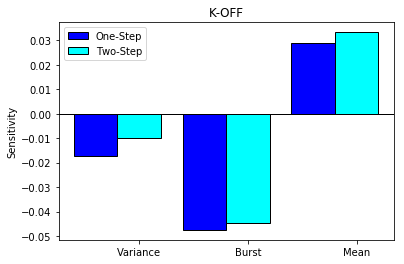

In [17]:
#####################   K - OFF  ############################

# libraries
import numpy as np
import matplotlib.pyplot as plt

 
# width of the bars
barWidth = 0.4
 
# Choose the height of the blue bars
bars1 = [iskoffvarsen, iskoffburstsen, iskoffmeansen]
 
# Choose the height of the cyan bars
bars2 = [iiskoffvarsen, iiskoffburstsen, iiskoffmeansen]
 
# The x position of bars
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
# Create blue bars
plt.bar(r1, bars1, width = barWidth, color = 'blue', edgecolor = 'black', capsize=7, label='One-Step')
 
# Create cyan bars
plt.bar(r2, bars2, width = barWidth, color = 'cyan', edgecolor = 'black', capsize=7, label='Two-Step')
 
# general layout
plt.xticks([r + barWidth for r in range(len(bars1))], ['Variance', 'Burst', 'Mean'])
plt.ylabel('Sensitivity')
plt.title ('K-OFF')
plt.axhline(y=0,linewidth=1, color='k')
plt.legend()
 
# Show graphic
plt.show()


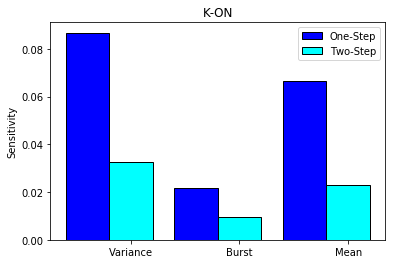

In [18]:
#####################   K - ON  ############################

# libraries
import numpy as np
import matplotlib.pyplot as plt

 
# width of the bars
barWidth = 0.4
 
# Choose the height of the blue bars
bars1 = [iskonvarsen, iskonburstsen, iskonmeansen]
 
# Choose the height of the cyan bars
bars2 = [iiskonvarsen, iiskonburstsen, iiskonmeansen]
 
# The x position of bars
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
# Create blue bars
plt.bar(r1, bars1, width = barWidth, color = 'blue', edgecolor = 'black', capsize=7, label='One-Step')
 
# Create cyan bars
plt.bar(r2, bars2, width = barWidth, color = 'cyan', edgecolor = 'black', capsize=7, label='Two-Step')
 
# general layout
plt.xticks([r + barWidth for r in range(len(bars1))], ['Variance', 'Burst', 'Mean'])
plt.ylabel('Sensitivity')
plt.title ('K-ON')
plt.axhline(y=0,linewidth=1, color='k')
plt.legend()
 
# Show graphic
plt.show()


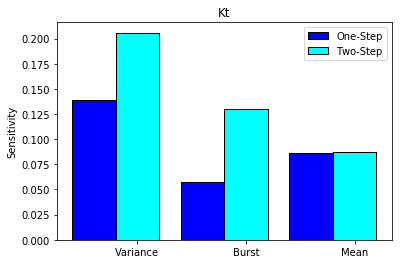

In [19]:
#####################   K - t  ############################

# libraries
import numpy as np
import matplotlib.pyplot as plt

# width of the bars
barWidth = 0.4
 
# Choose the height of the blue bars
bars1 = [isktvarsen, isktburstsen, isktmeansen]
 
# Choose the height of the cyan bars
bars2 = [iisktvarsen, iisktburstsen, iisktmeansen]
 
# The x position of bars
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
# Create blue bars
plt.bar(r1, bars1, width = barWidth, color = 'blue', edgecolor = 'black', capsize=7, label='One-Step')
 
# Create cyan bars
plt.bar(r2, bars2, width = barWidth, color = 'cyan', edgecolor = 'black', capsize=7, label='Two-Step')
 
# general layout
plt.xticks([r + barWidth for r in range(len(bars1))], ['Variance', 'Burst', 'Mean'])
plt.ylabel('Sensitivity')
plt.title ('Kt')
plt.axhline(y=0,linewidth=1, color='k')
plt.legend()
 
# Show graphic
plt.show()


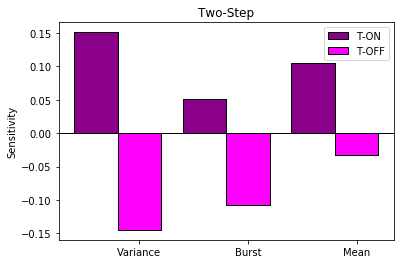

In [20]:
#####################   TWO-STEP (TON-TOFF ONLY) ############################

# libraries
import numpy as np
import matplotlib.pyplot as plt

 
# width of the bars
barWidth = 0.4
 
# Choose the height of the blue bars
bars1 = [iistonvarsen, iistonburstsen, iistonmeansen]
 
# Choose the height of the cyan bars
bars2 = [iistoffvarsen, iistoffmeansen, iistoffburstsen]
 
# The x position of bars
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
# Create blue bars
plt.bar(r1, bars1, width = barWidth, color = 'darkmagenta', edgecolor = 'black', capsize=7, label='T-ON')
 
# Create cyan bars
plt.bar(r2, bars2, width = barWidth, color = 'fuchsia', edgecolor = 'black', capsize=7, label='T-OFF')
 
# general layout
plt.xticks([r + barWidth for r in range(len(bars1))], ['Variance', 'Burst', 'Mean'])
plt.ylabel('Sensitivity')
plt.title ('Two-Step')
plt.axhline(y=0,linewidth=1, color='k')
plt.legend()
 
# Show graphic
plt.show()



We can see looking at the Koff sensitivities that the one step model is more sensitive than the two step model with respect to varience and burst, but slightly less sensitive than the two step model for the mean. 

The Kon sensitivities show us a much higher sensitivity from the one step model, this was expected as the parameter for kon within the one step model is unbounded, however the two step model contains a mechanism whereby kon can be inhibited by the closing of chromatin (ton/off). 

for Kt the two step model is more sensitive for the variance and burst, and is equal in sensitivity to the one step model for the mean. This may be explained by the fact that kt is higher in the two step model to counteract the various levels of regulation, and therefor is more sensitive to change in the value of kt. 

Finally the two step model ton and toff (chromatin regulation) is comapared, demonstrating that with regards to sensitivity, the ton paramter has a much higher value than toff. 